### T1

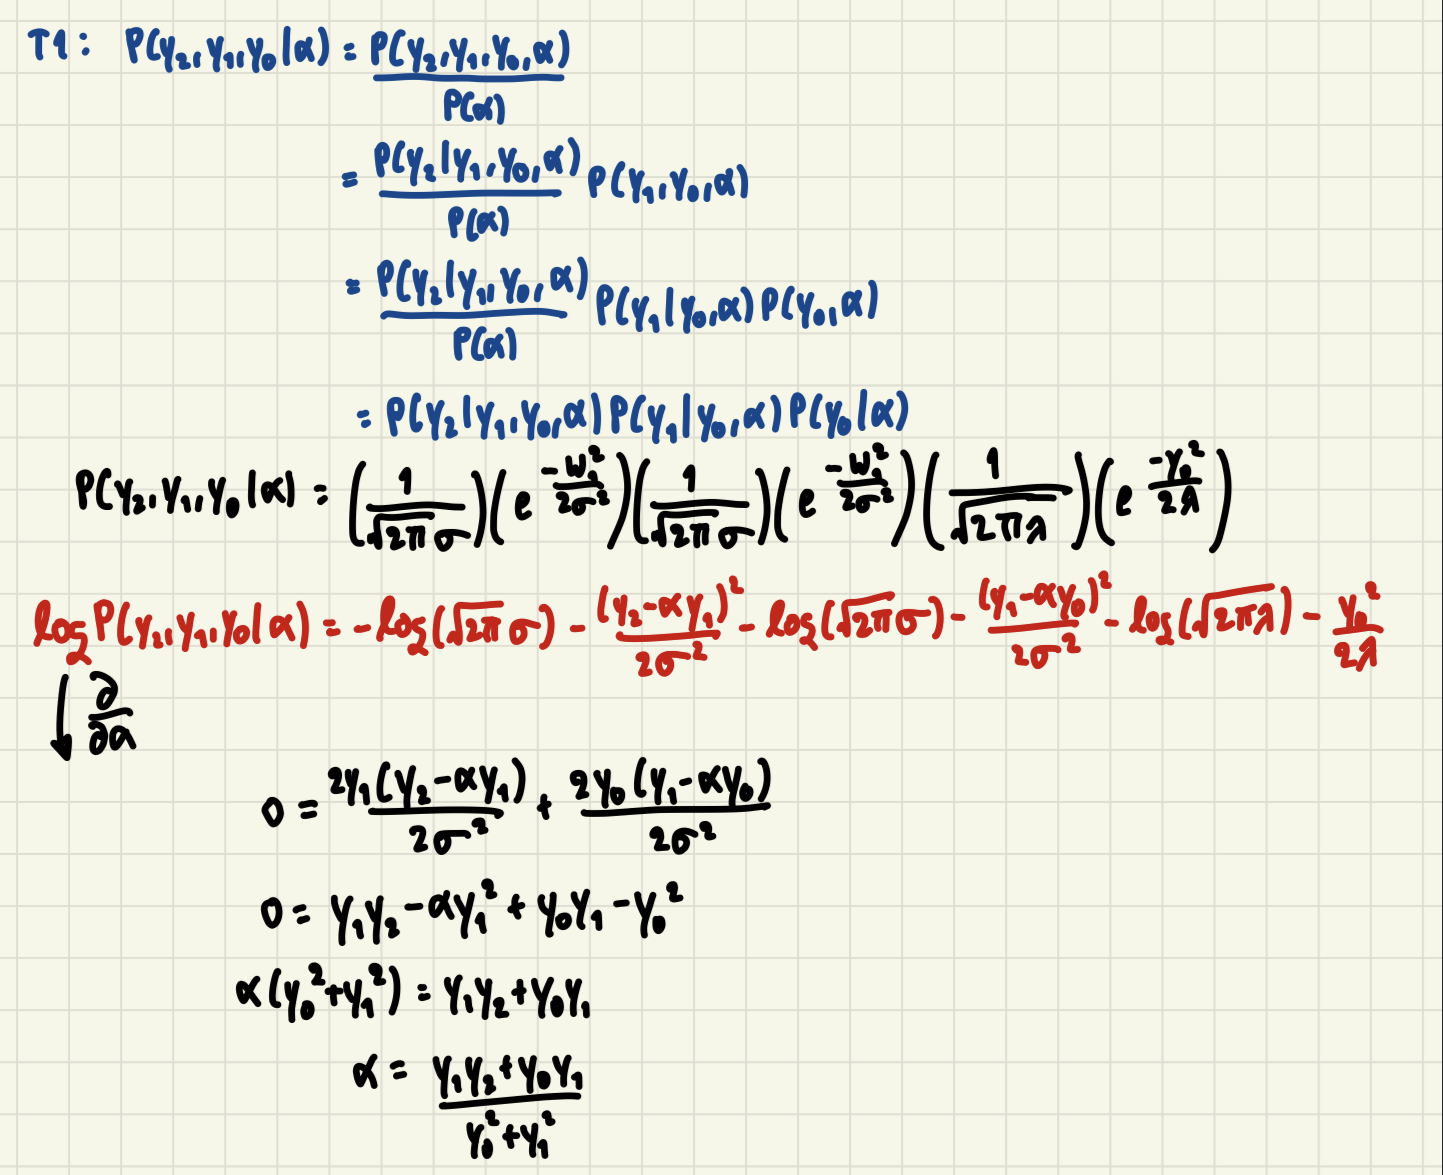

## OT1

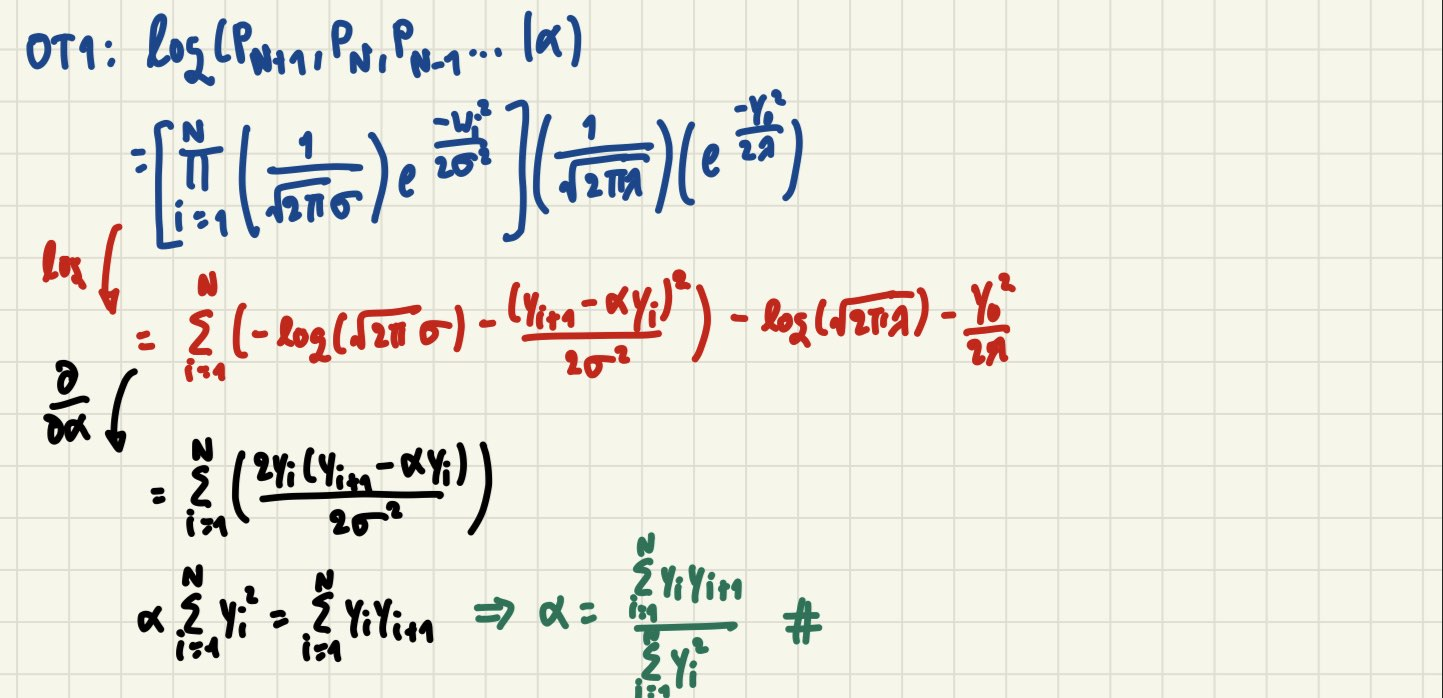

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 

In [3]:

def find_decision_boundary(mean_a, sd_a, mean_b, sd_b, prior_a, prior_b):
    x_axis = np.arange(-10, 10, 0.0001)

    likelihood_a = norm.pdf(x_axis, loc=mean_a, scale=sd_a)
    likelihood_b = norm.pdf(x_axis, loc=mean_b, scale=sd_b)

    # P(X) = P(X|happy) * P(happy) + P(X|Sad) * P(Sad)
    # Note: Ask TA whether I can use evidence as standard normal
    evidence = likelihood_a * prior_a + likelihood_b * prior_b

    plt.plot(x_axis, (likelihood_a / evidence) * prior_a, label="posterior a")
    plt.plot(x_axis, (likelihood_b / evidence) * prior_b, label="posterior b")
    plt.legend()
    plt.show()

    likelihood_ratio = likelihood_a / likelihood_b
    priors_ratio = prior_b / prior_a

    boundary_position = x_axis[likelihood_ratio >= priors_ratio][0]
    decision_boundary = likelihood_b[x_axis == boundary_position]

    plt.plot(x_axis, likelihood_a, label="likelihood a")
    plt.plot(x_axis, likelihood_b, label="likelihood b")
    plt.axvline(x=boundary_position)
    plt.legend()
    plt.show()

    return (boundary_position, decision_boundary[0])

## T2

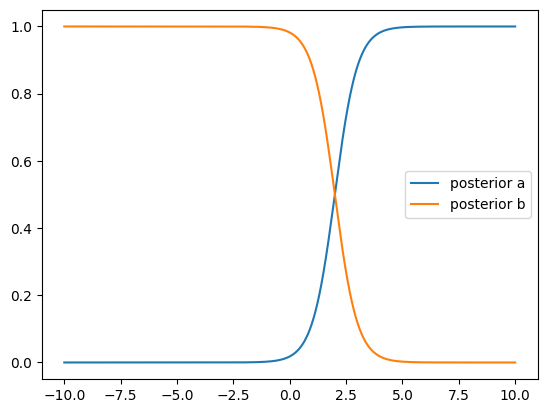

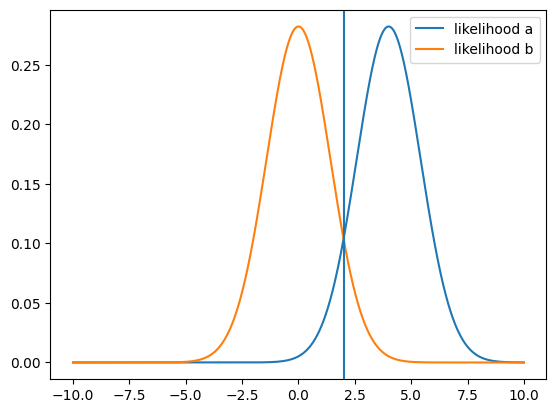

Decision Boundary is at (2.000099999972033, 0.10376649693006622)


In [4]:
print("Decision Boundary is at", find_decision_boundary(4, np.sqrt(2), 0, np.sqrt(2), 0.5, 0.5))

## T3

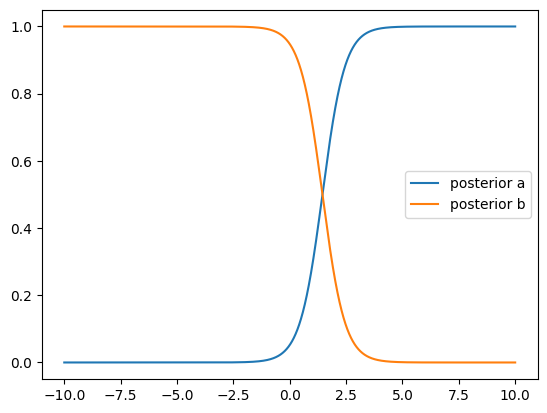

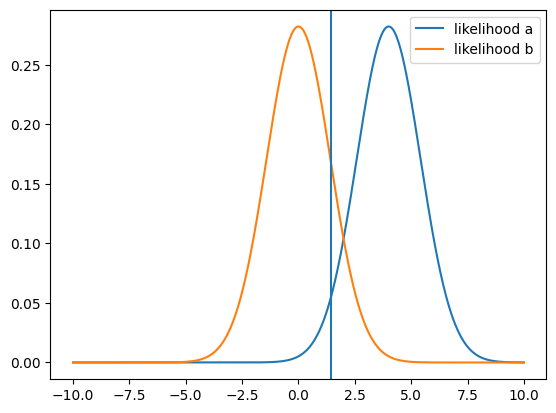

Decision Boundary is at (1.4506999999733132, 0.1666857883072887)


In [5]:
print("Decision Boundary is at", find_decision_boundary(4, np.sqrt(2), 0, np.sqrt(2), 0.75, 0.25))

## OT2

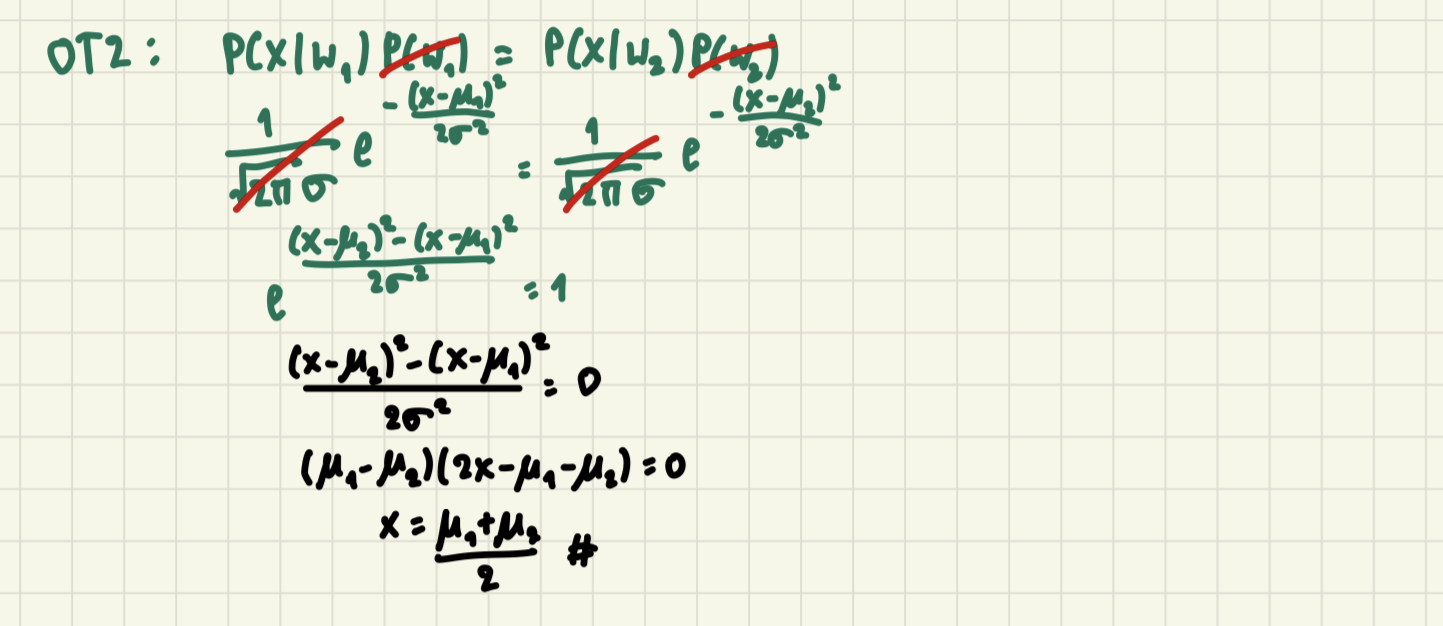

## OT3

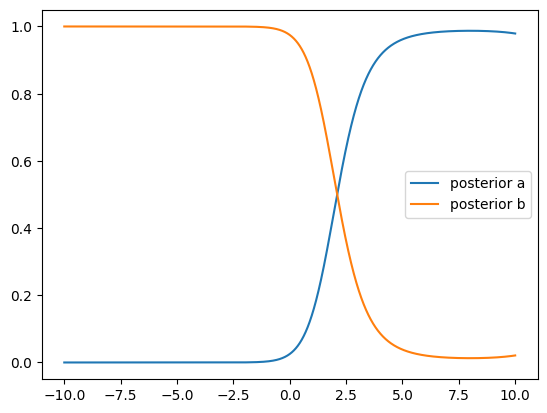

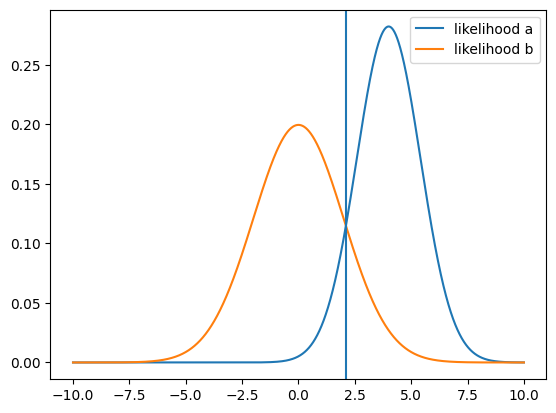

Decision Boundary: (2.1031999999717925, 0.11474798458217128)


In [6]:
print("Decision Boundary:", find_decision_boundary(4, np.sqrt(2), 0, 2, 0.5, 0.5))

# Employee Attrition Prediction



### read CSV

In [7]:
df = pd.read_csv('hr-employee-attrition-with-null.csv')

### Dataset statistic

In [8]:
df.describe()

,Unnamed: 0,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1176.000000,1176.000000,1176.00000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,734.500000,37.134354,798.875850,9.37500,2.920918,1.0,1031.399660,2.733844,65.821429,2.728741,...,2.694728,80.0,0.752551,11.295068,2.787415,2.770408,7.067177,4.290816,2.159014,4.096939
std,424.496761,9.190317,406.957684,8.23049,1.028796,0.0,601.188955,1.092992,20.317323,0.705280,...,1.093660,0.0,0.822550,7.783376,1.290507,0.705004,6.127836,3.630901,3.163524,3.537393
min,0.000000,18.000000,102.000000,1.00000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,30.000000,457.750000,2.00000,2.000000,1.0,494.750000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,36.000000,798.500000,7.00000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,43.000000,1168.250000,15.00000,4.000000,1.0,1562.250000,4.000000,84.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,1469.000000,60.000000,1499.000000,29.00000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [9]:
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41.0,Yes,Travel_Rarely,NaN,NaN,1.0,NaN,Life Sciences,1.0,...,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,1,NaN,No,NaN,279.0,Research & Development,NaN,NaN,Life Sciences,1.0,...,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,2,37.0,Yes,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,3,NaN,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,...,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,...,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


### Feature transformation

In [10]:
df.loc[df["Attrition"] == "no", "Attrition"] = 0.0
df.loc[df["Attrition"] == "yes", "Attrition"] = 1.0
string_categorical_col = ['Department', 'Attrition', 'BusinessTravel', 'EducationField', 'Gender', 'JobRole',
                              'MaritalStatus', 'Over18', 'OverTime']

# ENCODE STRING COLUMNS TO CATEGORICAL COLUMNS
for col in string_categorical_col:
    df[col] = pd.Categorical(df[col]).codes
    # INSERT CODE HERE

# HANDLE NULL NUMBERS
df[np.isnan(df)] = -1
# INSERT CODE HERE

df = df.loc[:, ~df.columns.isin(['EmployeeNumber', 'Unnamed: 0', 'EmployeeCount', 'StandardHours', 'Over18'])]

###  Spliting data into train and test

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df_train, df_test = train_test_split(df, test_size=0.1, train_size=0.9)

### Display histogram of each feature

In [13]:
def display_histogram(df, col_name, cls, n_bin = 40):
    train_col_no_nan = df[col_name][~(df[col_name] == -1)]
    hist, bin_edge = np.histogram(train_col_no_nan, n_bin)

    hist = np.array(hist, dtype=float) / np.sum(hist)

    plt.fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2), facecolor="steelblue")
    plt.title(cls)
    plt.show()

    print("Zero bins:", np.sum(hist == 0))
    # INSERT CODE HERE

### T4. Observe the histogram for Age, MonthlyIncome and DistanceFromHome. How many bins have zero counts? Do you think this is a good discretization? Why?

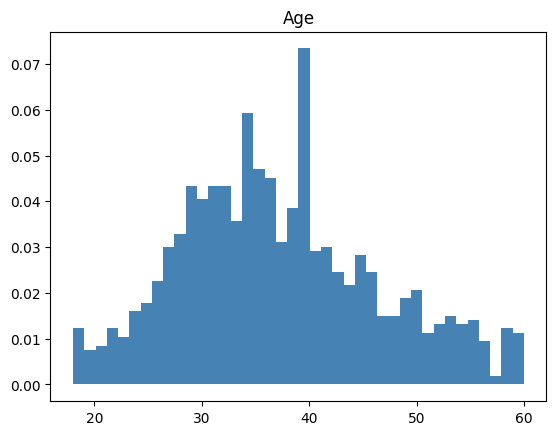

Zero bins: 0


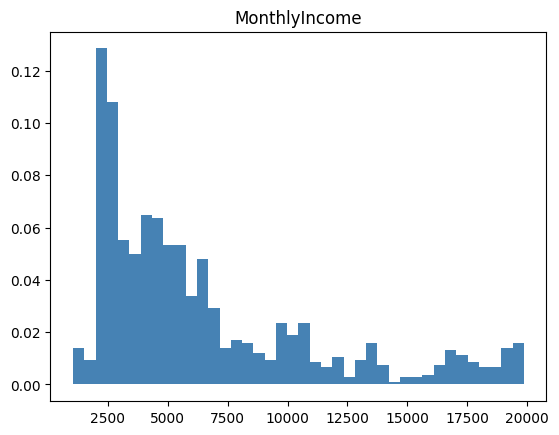

Zero bins: 0


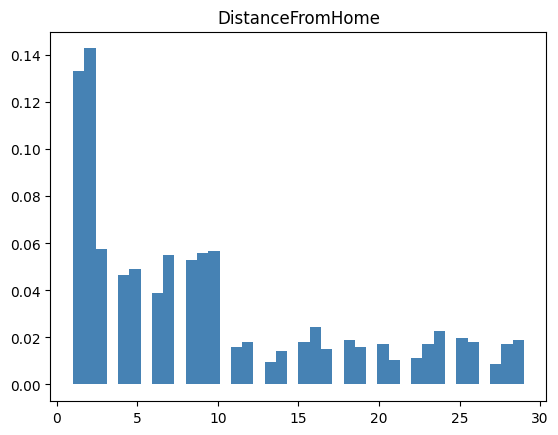

Zero bins: 11


In [14]:
display_histogram(df_train, "Age", "Age", 40)
display_histogram(df_train, "MonthlyIncome", "MonthlyIncome", 40)
display_histogram(df_train, "DistanceFromHome", "DistanceFromHome", 40)

- `Age` has 0 zero bin
- `MonthlyIncome` has 0 zero bin
- `DistanceFromHome` has 11 zero bins

Feature `DistanceFromHome` does not get a good discretization with bin size 40 because it appears zero bins in the histogram even though `Age` and `MonthlyIncome` gets a smooth histogram

### T5. Can we use a Gaussian to estimate this histogram? Why? What about a Gaussian Mixture Model (GMM)?

### T6. Now plot the histogram according to the method described above (with 10, 40, and 100 bins) and show 3 plots each for Age, MonthlyIncome, and DistanceFromHome. Which bin size is most sensible for each features? Why?

In [15]:
def plot_histogram_v2(df, col_name, n_bin = 10):
    train_col_no_nan = df[col_name][~(df[col_name] == -1)]
    min_bin = -1e9
    max_bin = 1e9

    max_train = np.max(train_col_no_nan)
    min_train = np.min(train_col_no_nan)

    bins = np.linspace(start=min_train * 1.01, stop=max_train / 1.01, num=n_bin - 2)
    bins = np.insert(bins, 0, min_bin)
    bins = np.append(bins, max_bin)

    digitized_df = np.digitize(train_col_no_nan, bins)
    hist = np.bincount(digitized_df) / np.sum(digitized_df)

    plt.fill_between(np.arange(0, n_bin), hist, facecolor="steelblue")
    plt.title(f"{col_name} (bin size={n_bin})")
    plt.show()

    return bins, hist

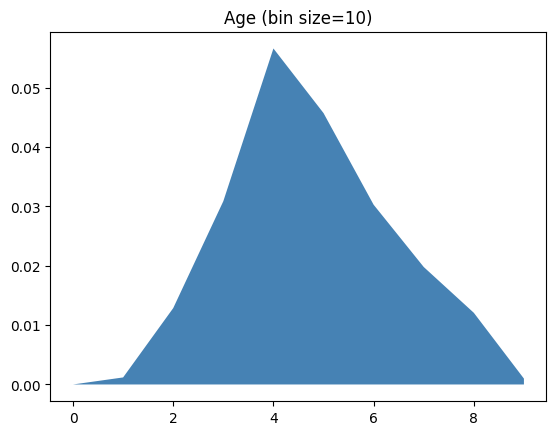

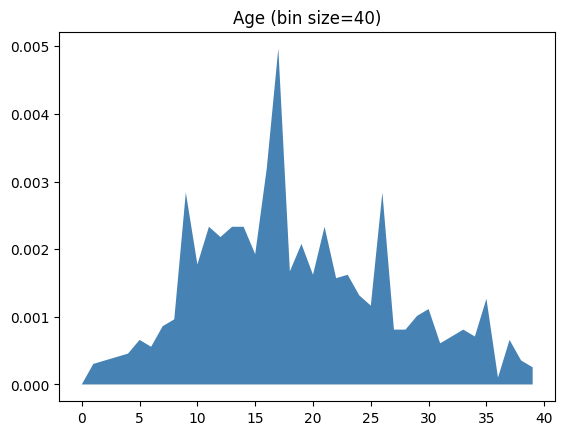

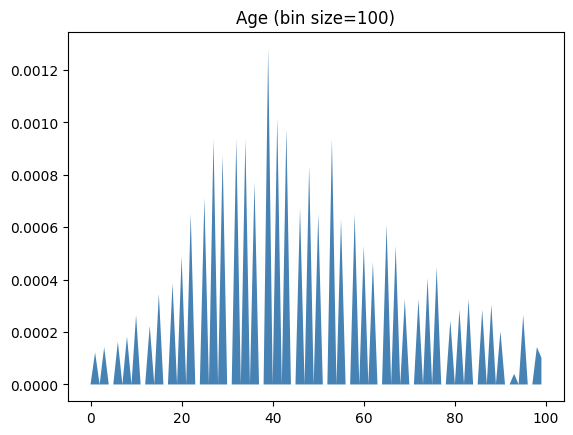

(array([-1.00000000e+09,  1.81800000e+01,  1.86050097e+01,  1.90300194e+01,
         1.94550291e+01,  1.98800388e+01,  2.03050485e+01,  2.07300582e+01,
         2.11550679e+01,  2.15800776e+01,  2.20050873e+01,  2.24300970e+01,
         2.28551067e+01,  2.32801164e+01,  2.37051261e+01,  2.41301358e+01,
         2.45551455e+01,  2.49801551e+01,  2.54051648e+01,  2.58301745e+01,
         2.62551842e+01,  2.66801939e+01,  2.71052036e+01,  2.75302133e+01,
         2.79552230e+01,  2.83802327e+01,  2.88052424e+01,  2.92302521e+01,
         2.96552618e+01,  3.00802715e+01,  3.05052812e+01,  3.09302909e+01,
         3.13553006e+01,  3.17803103e+01,  3.22053200e+01,  3.26303297e+01,
         3.30553394e+01,  3.34803491e+01,  3.39053588e+01,  3.43303685e+01,
         3.47553782e+01,  3.51803879e+01,  3.56053976e+01,  3.60304073e+01,
         3.64554170e+01,  3.68804267e+01,  3.73054364e+01,  3.77304461e+01,
         3.81554558e+01,  3.85804654e+01,  3.90054751e+01,  3.94304848e+01,
         3.9

In [16]:
plot_histogram_v2(df_train, "Age", 10)
plot_histogram_v2(df_train, "Age", 40)
plot_histogram_v2(df_train, "Age", 100)

For age feature, we will see that when bin size is 100 there start to have zero bins appearing in histogram but it look like a normal distribution curve also

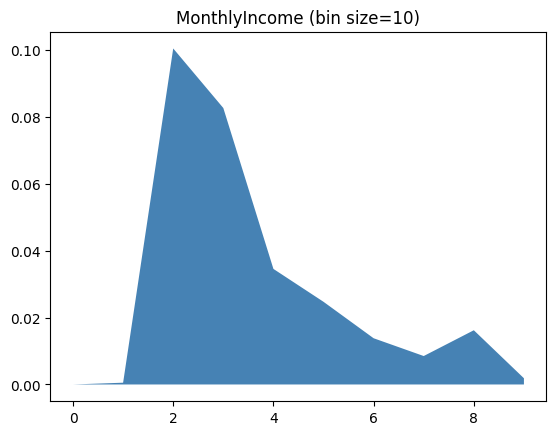

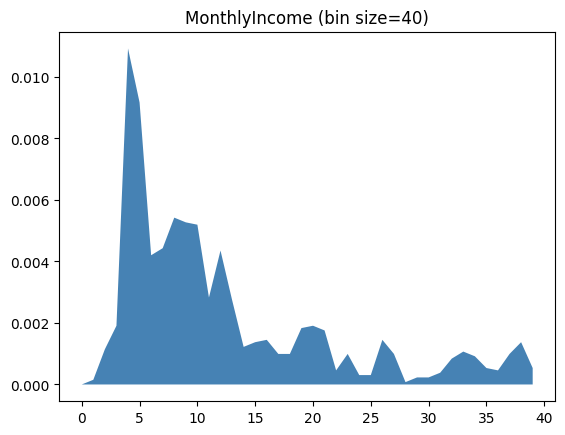

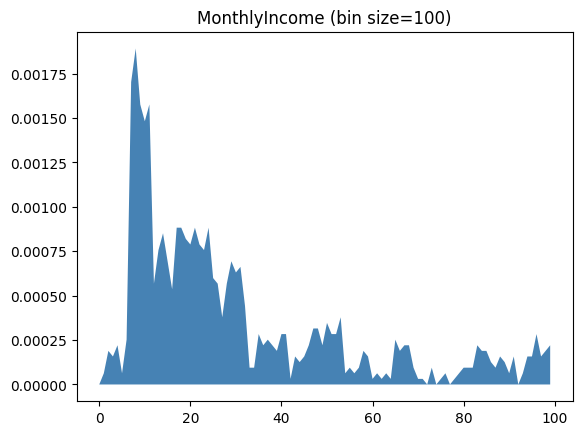

(array([-1.00000000e+09,  1.06151000e+03,  1.25327151e+03,  1.44503302e+03,
         1.63679452e+03,  1.82855603e+03,  2.02031754e+03,  2.21207905e+03,
         2.40384055e+03,  2.59560206e+03,  2.78736357e+03,  2.97912508e+03,
         3.17088658e+03,  3.36264809e+03,  3.55440960e+03,  3.74617111e+03,
         3.93793261e+03,  4.12969412e+03,  4.32145563e+03,  4.51321714e+03,
         4.70497864e+03,  4.89674015e+03,  5.08850166e+03,  5.28026317e+03,
         5.47202467e+03,  5.66378618e+03,  5.85554769e+03,  6.04730920e+03,
         6.23907071e+03,  6.43083221e+03,  6.62259372e+03,  6.81435523e+03,
         7.00611674e+03,  7.19787824e+03,  7.38963975e+03,  7.58140126e+03,
         7.77316277e+03,  7.96492427e+03,  8.15668578e+03,  8.34844729e+03,
         8.54020880e+03,  8.73197030e+03,  8.92373181e+03,  9.11549332e+03,
         9.30725483e+03,  9.49901633e+03,  9.69077784e+03,  9.88253935e+03,
         1.00743009e+04,  1.02660624e+04,  1.04578239e+04,  1.06495854e+04,
         1.0

In [17]:
plot_histogram_v2(df_train, "MonthlyIncome", 10)
plot_histogram_v2(df_train, "MonthlyIncome", 40)
plot_histogram_v2(df_train, "MonthlyIncome", 100)

For MonthlyIncome feature, we will see that the sensible point start at bin size 100 which start to see the zero bins that should not appear in probabilistic estimation

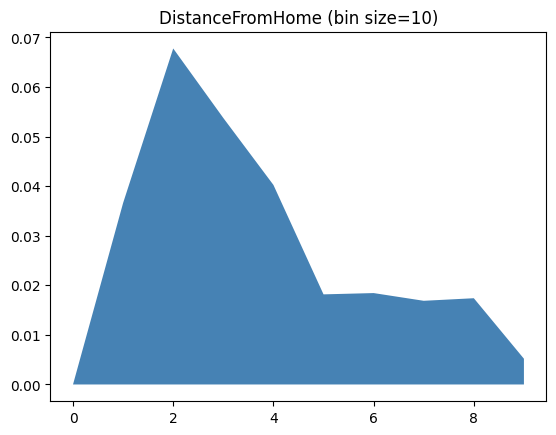

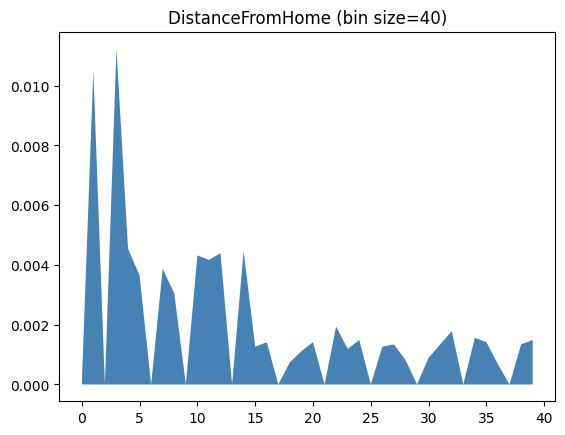

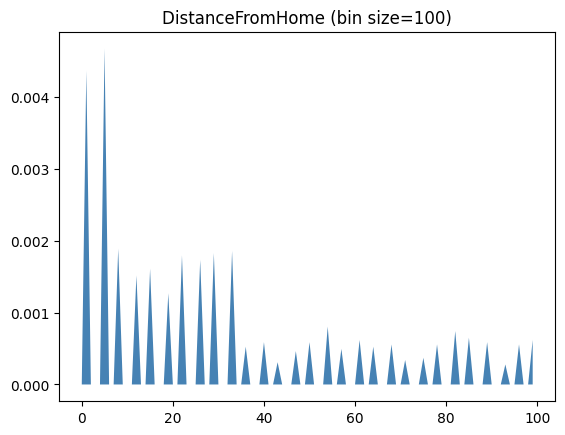

(array([-1.00000000e+09,  1.01000000e+00,  1.29559661e+00,  1.58119322e+00,
         1.86678983e+00,  2.15238644e+00,  2.43798306e+00,  2.72357967e+00,
         3.00917628e+00,  3.29477289e+00,  3.58036950e+00,  3.86596611e+00,
         4.15156272e+00,  4.43715933e+00,  4.72275595e+00,  5.00835256e+00,
         5.29394917e+00,  5.57954578e+00,  5.86514239e+00,  6.15073900e+00,
         6.43633561e+00,  6.72193222e+00,  7.00752884e+00,  7.29312545e+00,
         7.57872206e+00,  7.86431867e+00,  8.14991528e+00,  8.43551189e+00,
         8.72110850e+00,  9.00670511e+00,  9.29230173e+00,  9.57789834e+00,
         9.86349495e+00,  1.01490916e+01,  1.04346882e+01,  1.07202848e+01,
         1.10058814e+01,  1.12914780e+01,  1.15770746e+01,  1.18626712e+01,
         1.21482678e+01,  1.24338644e+01,  1.27194611e+01,  1.30050577e+01,
         1.32906543e+01,  1.35762509e+01,  1.38618475e+01,  1.41474441e+01,
         1.44330407e+01,  1.47186373e+01,  1.50042339e+01,  1.52898306e+01,
         1.5

In [18]:
plot_histogram_v2(df_train, "DistanceFromHome", 10)
plot_histogram_v2(df_train, "DistanceFromHome", 40)
plot_histogram_v2(df_train, "DistanceFromHome", 100)

For DistanceFromHome feature, we will see that at least bin size 40 it seems to appear the zero bins in histogram

### T7. For the rest of the features, which one should be discretized in order to be modeled by histograms? What are the criteria for choosing whether we should discretize a feature or not? Answer this and discretize those features into 10 bins each. In other words, figure out the bin edge for each feature, then use digitize() to convert the features to discrete values

In [19]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1,2,-1.0,-1,1.0,-1.0,1,2.0,0,...,-1.0,1.0,0.0,8.0,0.0,-1.0,6.0,-1.0,0.0,-1.0
1,-1.0,0,-1,279.0,1,-1.0,-1.0,1,3.0,1,...,-1.0,4.0,1.0,10.0,-1.0,3.0,10.0,-1.0,-1.0,7.0
2,37.0,1,-1,1373.0,-1,2.0,2.0,-1,-1.0,1,...,3.0,-1.0,0.0,7.0,3.0,-1.0,-1.0,0.0,-1.0,0.0
3,-1.0,0,1,1392.0,1,3.0,4.0,1,-1.0,0,...,3.0,3.0,-1.0,8.0,3.0,-1.0,8.0,-1.0,3.0,0.0
4,27.0,0,2,591.0,1,2.0,1.0,3,1.0,1,...,3.0,4.0,1.0,6.0,-1.0,3.0,2.0,2.0,2.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,0,1,884.0,1,-1.0,-1.0,3,3.0,1,...,3.0,3.0,1.0,17.0,3.0,3.0,5.0,2.0,0.0,3.0
1466,39.0,0,2,613.0,-1,6.0,-1.0,3,4.0,-1,...,3.0,-1.0,-1.0,9.0,5.0,3.0,7.0,7.0,1.0,7.0
1467,27.0,0,-1,155.0,1,4.0,3.0,1,2.0,1,...,-1.0,2.0,1.0,6.0,0.0,3.0,6.0,-1.0,0.0,3.0
1468,49.0,0,1,1023.0,2,2.0,3.0,-1,4.0,1,...,3.0,4.0,0.0,17.0,-1.0,2.0,9.0,6.0,0.0,8.0


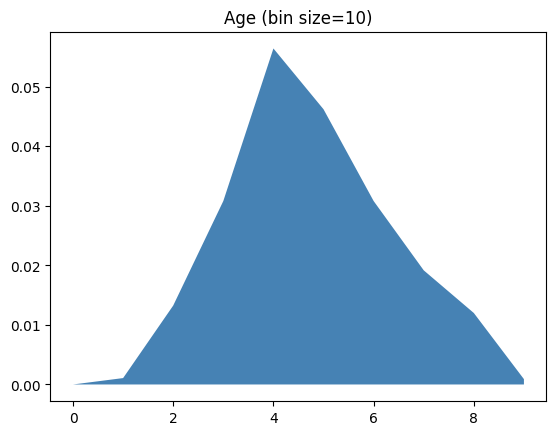

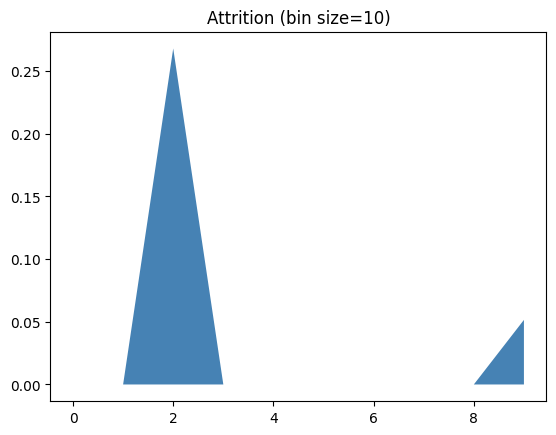

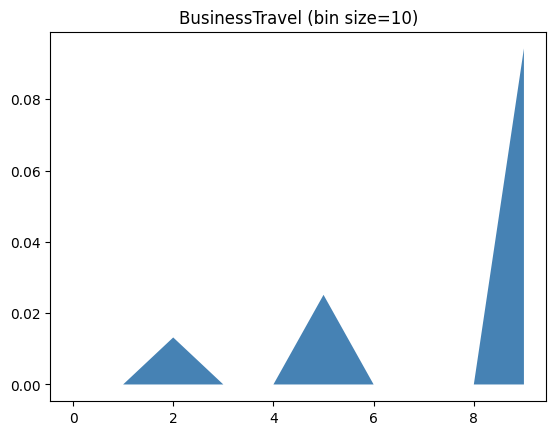

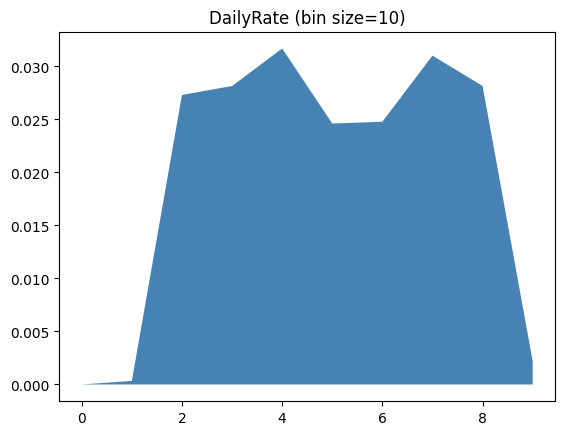

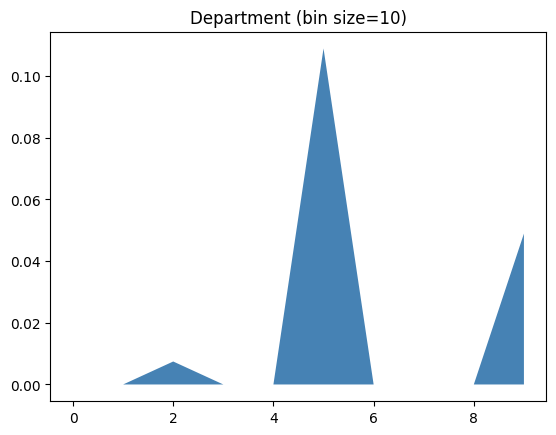

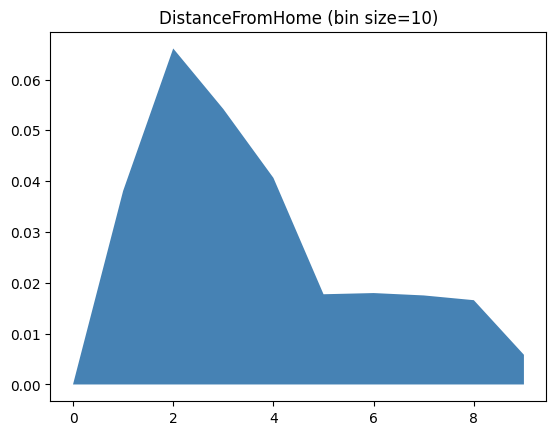

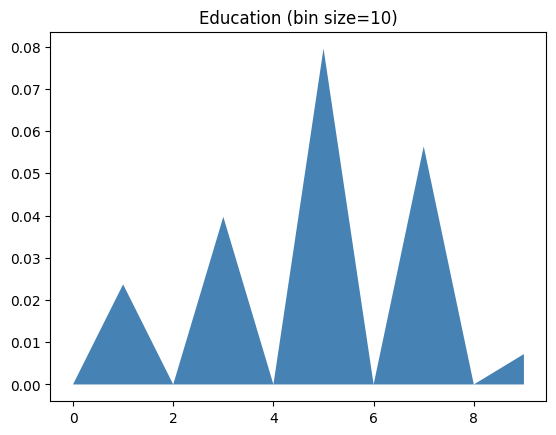

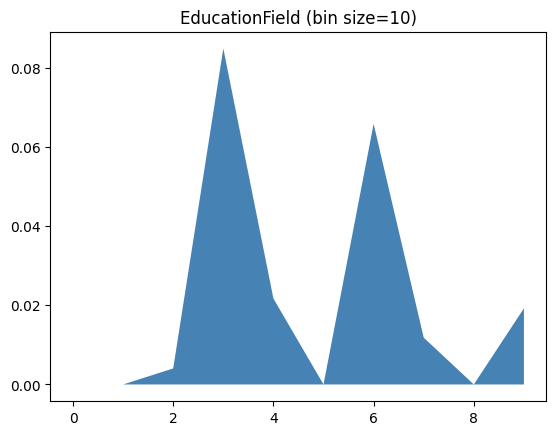

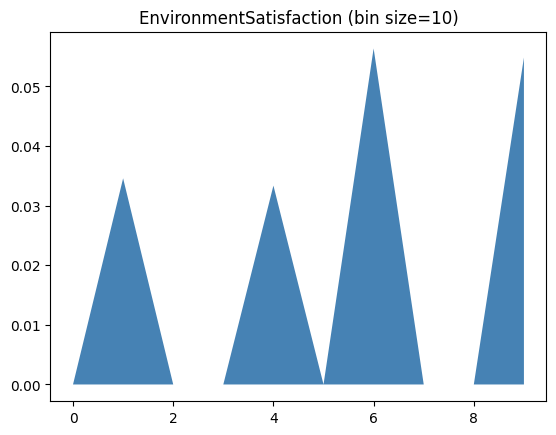

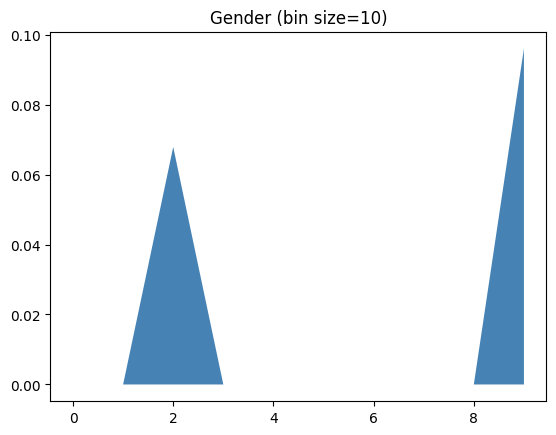

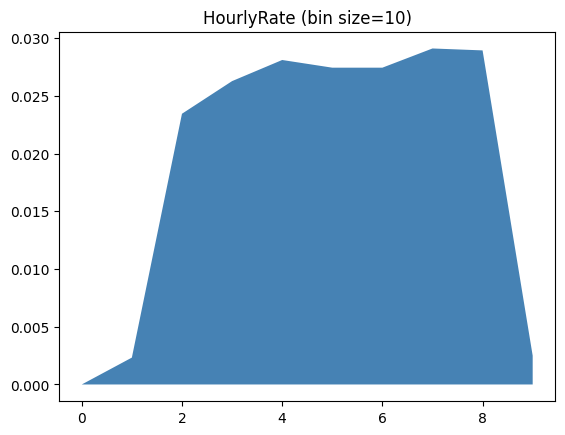

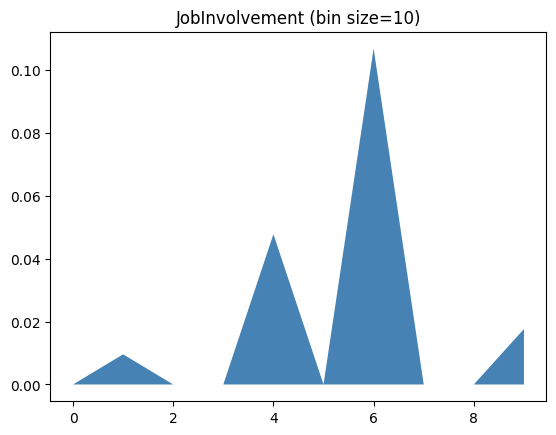

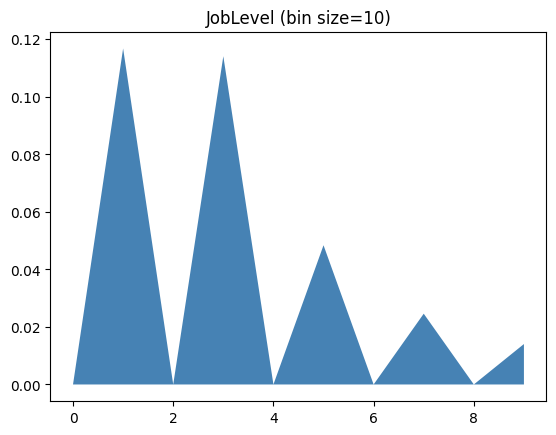

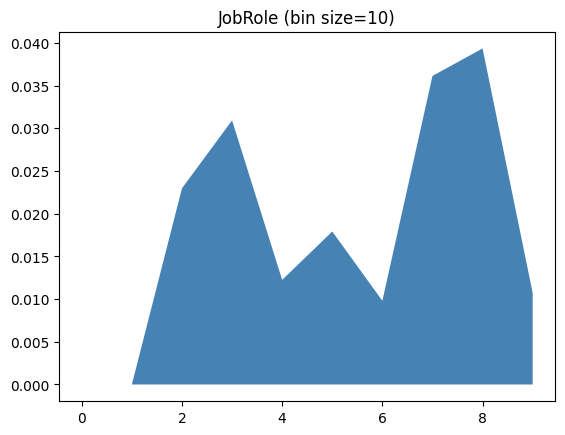

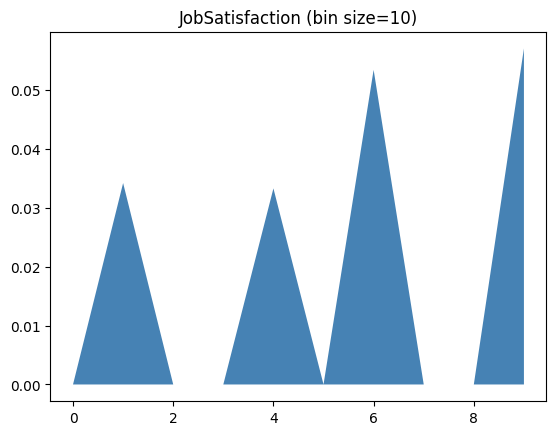

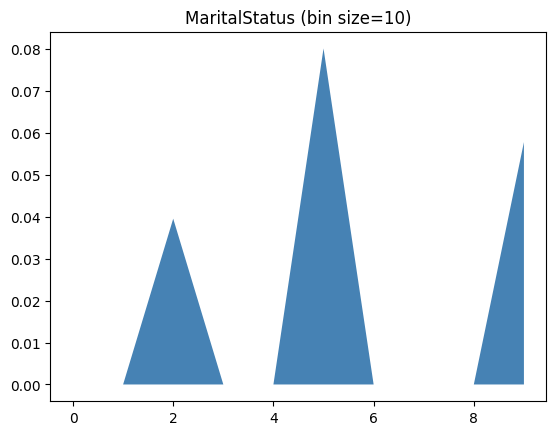

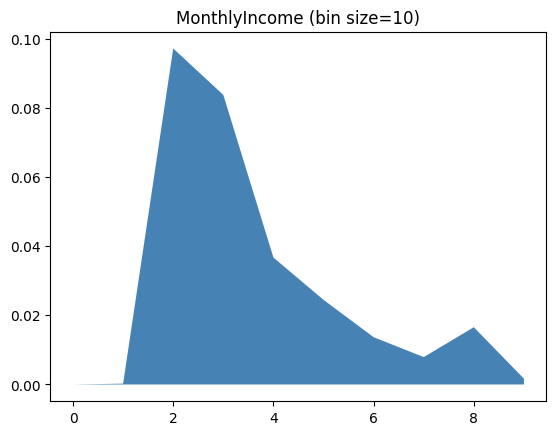

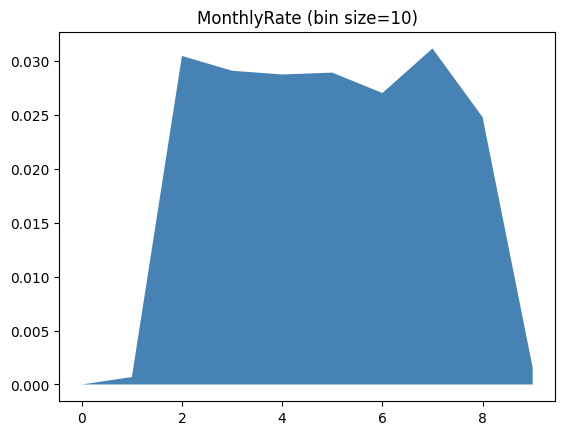

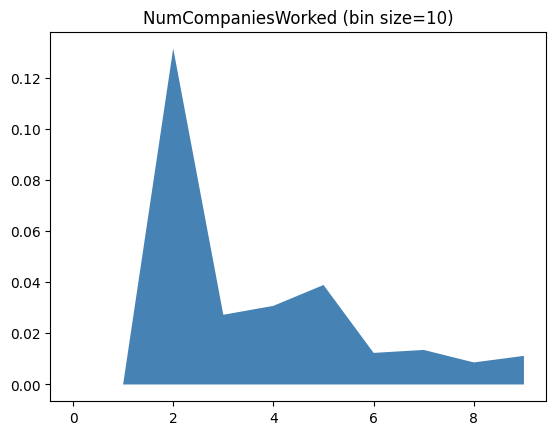

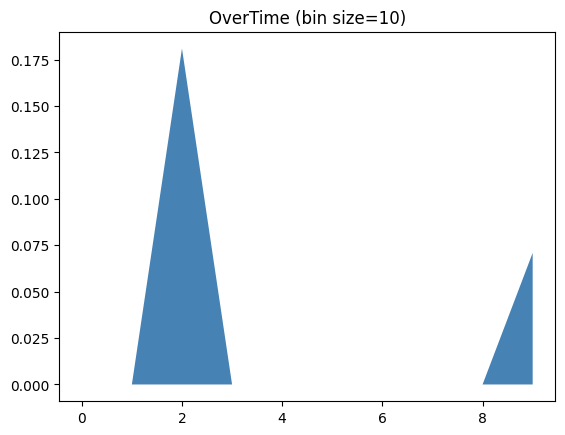

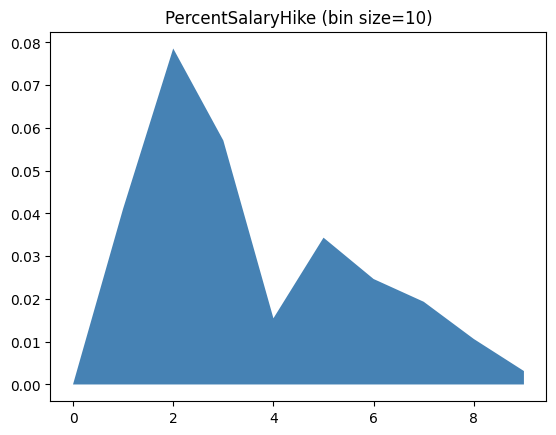

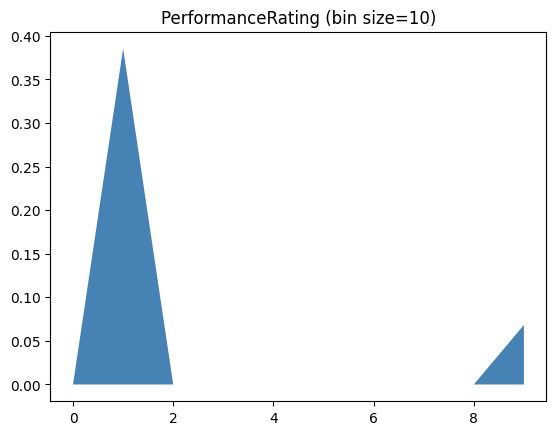

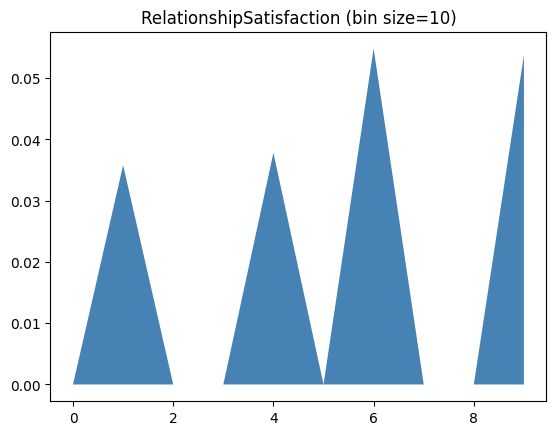

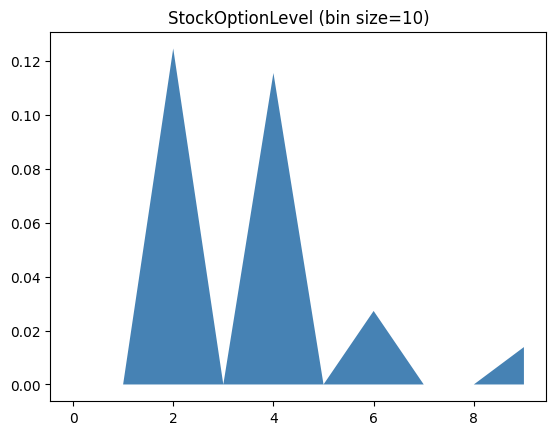

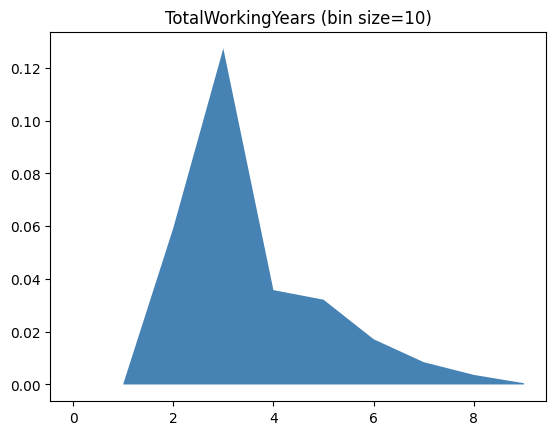

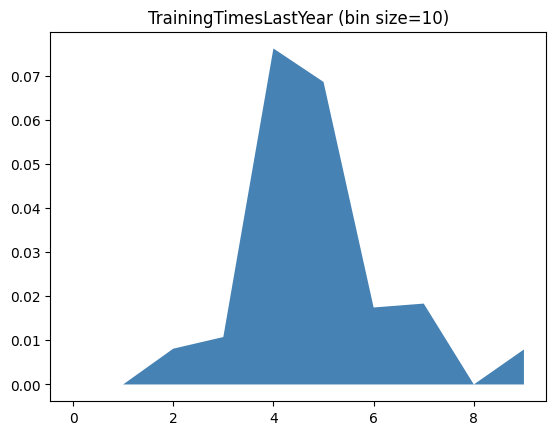

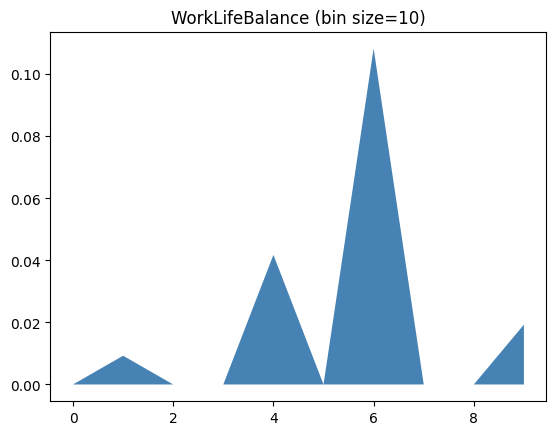

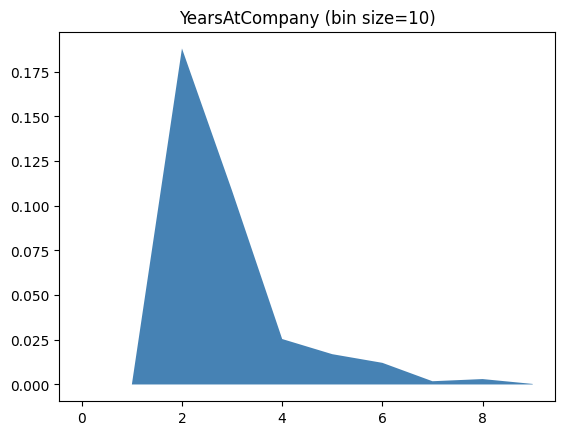

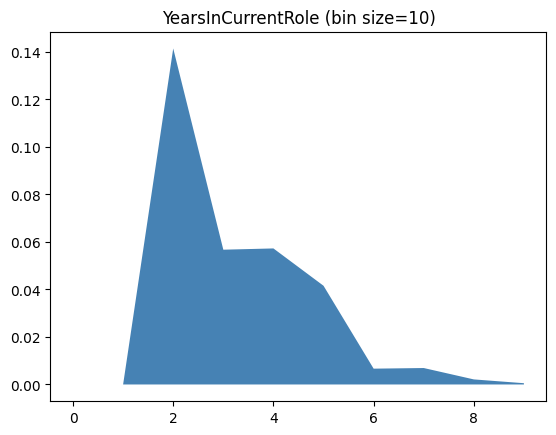

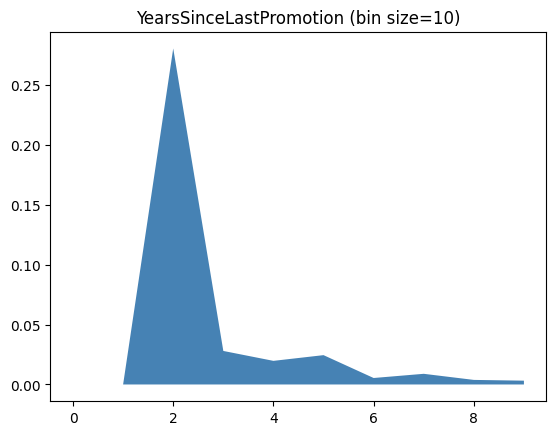

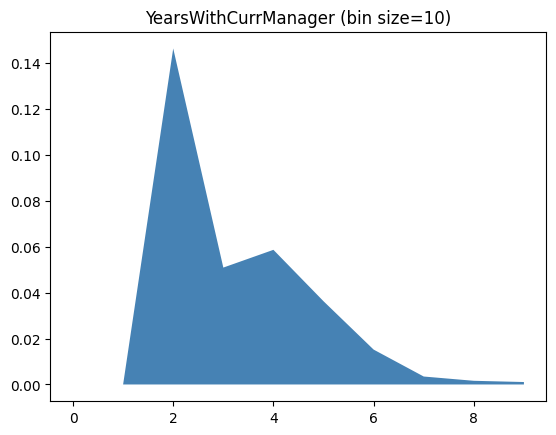

In [20]:
for col in df.columns:
    plot_histogram_v2(df, col, 10)

### T8. What kind of distribution should we use to model histograms? (Answer a distribution name) What is the MLE for the likelihood distribution? (Describe how to do the MLE). Plot the likelihood distributions of MonthlyIncome, JobRole, HourlyRate, and MaritalStatus for different Attrition values.

The distribution which we will use for describing histograms is multinomial distribution

$P(X = x) = P(X_1 = x_1, X_2 = x_2, X_3 = x_3,..., X_k = x_k) = \frac{n!}{x_1!x_2!...x_k!}p_1^{x_1}p_2^{x_2}...p_k^{x_k}$

### T9. What is the prior distribution of the two classes?

### T10. If we use the current Naive Bayes with our current Maximum Likelihood Estimates, we will find that some P (x i |attrition) will be zero and will result in the entire product term to be zero. Propose a method to fix this problem.

### T11. Implement your Naive Bayes classifier. Use the learned distributions to classify the test set. Don’t forget to allow your classifier to handle missing values in the test set. Report the overall Accuracy. Then, report the Precision, Recall, and F score for detecting attrition. See Lecture 1 for the definitions of each metric.


In [21]:
import random as rnd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

class SimpleBayesClassifier:

    def __init__(self, n_pos, n_neg):
        
        """
        Initializes the SimpleBayesClassifier with prior probabilities.

        Parameters:
        n_pos (int): The number of positive samples.
        n_neg (int): The number of negative samples.
        
        Returns:
        None: This method does not return anything as it is a constructor.
        """

        self.n_pos = n_pos
        self.n_neg = n_neg
        self.prior_pos = (n_pos) / (n_pos + n_neg)
        self.prior_neg = (n_neg) / (n_pos + n_neg)

    def fit_params(self, x, y, n_bins = 10):

        """
        Computes histogram-based parameters for each feature in the dataset.

        Parameters:
        x (np.ndarray): The feature matrix, where rows are samples and columns are features.
        y (np.ndarray): The target array, where each element corresponds to the label of a sample.
        n_bins (int): Number of bins to use for histogram calculation.

        Returns:
        (stay_params, leave_params): A tuple containing two lists of tuples, 
        one for 'stay' parameters and one for 'leave' parameters.
        Each tuple in the list contains the bins and edges of the histogram for a feature.
        """

        self.stay_params = [(None, None) for _ in range(x.shape[1])]
        self.leave_params = [(None, None) for _ in range(x.shape[1])]

        # INSERT CODE HERE
        
        return self.stay_params, self.leave_params

    def predict(self, x, thresh = 0):

        """
        Predicts the class labels for the given samples using the non-parametric model.

        Parameters:
        x (np.ndarray): The feature matrix for which predictions are to be made.
        thresh (float): The threshold for log probability to decide between classes.

        Returns:
        result (list): A list of predicted class labels (0 or 1) for each sample in the feature matrix.
        """

        y_pred = []

        # INSERT CODE HERE

        return y_pred
    
    def fit_gaussian_params(self, x: np.ndarray, y: np.ndarray):

        """
        Computes mean and standard deviation for each feature in the dataset.

        Parameters:
        x (np.ndarray): The feature matrix, where rows are samples and columns are features.
        y (np.ndarray): The target array, where each element corresponds to the label of a sample.

        Returns:
        (gaussian_stay_params, gaussian_leave_params): A tuple containing two lists of tuples,
        one for 'stay' parameters and one for 'leave' parameters.
        Each tuple in the list contains the mean and standard deviation for a feature.
        """

        self.gaussian_stay_params = [(0, 0) for _ in range(x.shape[1])]
        self.gaussian_leave_params = [(0, 0) for _ in range(x.shape[1])]

        stay_df = x[y == 1]
        leave_df = x[y == 0]

        column_width = x.shape[1]
        
        for i in range(column_width):
            self.gaussian_stay_params[i] = (np.mean(stay_df[:,i]), np.std(stay_df[:,i]))
            self.gaussian_leave_params[i] = (np.mean(leave_df[:,i]), np.std(leave_df[:,i]))

        return self.gaussian_stay_params, self.gaussian_leave_params
    
    def gaussian_predict(self, x:np.ndarray, thresh = 0):
        """
        Predicts the class labels for the given samples using the parametric model.

        Parameters:
        x (np.ndarray): The feature matrix for which predictions are to be made.
        thresh (float): The threshold for log probability to decide between classes.

        Returns:
        result (list): A list of predicted class labels (0 or 1) for each sample in the feature matrix.
        """

        y_pred = []

        # INSERT CODE HERE
        for data in x:
            classifier = np.log(self.prior_neg) - np.log(self.prior_pos)
            for (idx, feature) in enumerate(data):
                dist_pos = stats.norm(self.gaussian_stay_params[idx][0], self.gaussian_stay_params[idx][1])
                dist_neg = stats.norm(self.gaussian_leave_params[idx][0], self.gaussian_leave_params[idx][1])

                log_prob_pos = dist_pos.logpdf(feature)
                log_prob_neg = dist_neg.logpdf(feature)

                classifier += log_prob_neg - log_prob_pos

            y_pred.append(1 if classifier <= thresh else 0)

        return y_pred

In [22]:
data_train = df_train.to_numpy()
data_test = df_test.to_numpy()

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1,2,-1.0,-1,1.0,-1.0,1,2.0,0,...,-1.0,1.0,0.0,8.0,0.0,-1.0,6.0,-1.0,0.0,-1.0
1,-1.0,0,-1,279.0,1,-1.0,-1.0,1,3.0,1,...,-1.0,4.0,1.0,10.0,-1.0,3.0,10.0,-1.0,-1.0,7.0
2,37.0,1,-1,1373.0,-1,2.0,2.0,-1,-1.0,1,...,3.0,-1.0,0.0,7.0,3.0,-1.0,-1.0,0.0,-1.0,0.0
3,-1.0,0,1,1392.0,1,3.0,4.0,1,-1.0,0,...,3.0,3.0,-1.0,8.0,3.0,-1.0,8.0,-1.0,3.0,0.0
4,27.0,0,2,591.0,1,2.0,1.0,3,1.0,1,...,3.0,4.0,1.0,6.0,-1.0,3.0,2.0,2.0,2.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,0,1,884.0,1,-1.0,-1.0,3,3.0,1,...,3.0,3.0,1.0,17.0,3.0,3.0,5.0,2.0,0.0,3.0
1466,39.0,0,2,613.0,-1,6.0,-1.0,3,4.0,-1,...,3.0,-1.0,-1.0,9.0,5.0,3.0,7.0,7.0,1.0,7.0
1467,27.0,0,-1,155.0,1,4.0,3.0,1,2.0,1,...,-1.0,2.0,1.0,6.0,0.0,3.0,6.0,-1.0,0.0,3.0
1468,49.0,0,1,1023.0,2,2.0,3.0,-1,4.0,1,...,3.0,4.0,0.0,17.0,-1.0,2.0,9.0,6.0,0.0,8.0


In [23]:
x_train = np.delete(data_train, 1, axis=1)
y_train = data_train[:,1]

x_test = np.delete(data_test, 1, axis=1)
y_test = data_test[:,1]

In [24]:
model = SimpleBayesClassifier(n_pos = np.sum(y_train == 1), n_neg = np.sum(y_train == 0))

In [25]:
def check_prior():
    """
    This function designed to test the implementation of the prior probability calculation in a Naive Bayes classifier. 
    Specifically, it checks if the classifier correctly computes the prior probabilities for the 
    negative and positive classes based on given input counts.
    """
    
    # prior_neg = 5/(5 + 5) = 0.5 and # prior_pos = 5/(5 + 5) = 0.5
    assert (SimpleBayesClassifier(5, 5).prior_pos, SimpleBayesClassifier(5, 5).prior_neg) == (0.5, 0.5)

    assert (SimpleBayesClassifier(3, 5).prior_pos, SimpleBayesClassifier(3, 5).prior_neg) == (0.375, 0.625)
    assert (SimpleBayesClassifier(0, 1).prior_pos, SimpleBayesClassifier(0, 1).prior_neg) == (0.0, 1.0)
    assert (SimpleBayesClassifier(1, 0).prior_pos, SimpleBayesClassifier(1, 0).prior_neg) == (1.0, 0.0)
    
check_prior()

In [26]:
model.fit_params(x_train, y_train)

([(None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None)],
 [(None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None),
  (None, None)])

In [27]:
def check_fit_params():

    """
    This function is designed to test the fit_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is bins and edges from each histogram.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {STAY_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {STAY_PARAMS_1[f_idx][1]}")
    print("")    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {LEAVE_PARAMS_1[f_idx][1]}")

check_fit_params()

STAY PARAMETERS
Feature : 0
BINS : None
EDGES : None
Feature : 1
BINS : None
EDGES : None
Feature : 2
BINS : None
EDGES : None
Feature : 3
BINS : None
EDGES : None

LEAVE PARAMETERS
Feature : 0
BINS : None
EDGES : None
Feature : 1
BINS : None
EDGES : None
Feature : 2
BINS : None
EDGES : None
Feature : 3
BINS : None
EDGES : None


In [28]:
y_pred = model.predict(x = x_test)

In [29]:
def evaluate(y_true, y_pred, cls = 0):
  y_pred_arr = np.array(y_pred)
  y_true_arr = np.array(y_true)

  fpr = y_true_arr == y_pred_arr

  accuracy = np.sum(fpr) / len(y_pred)
  recall = np.sum(fpr[y_pred_arr == cls]) / np.sum(y_true_arr == cls)
  precision = np.sum(fpr[y_pred_arr == cls]) / np.sum(y_pred_arr == cls)
  F1 = 2 * (recall * precision) / (recall + precision)

  return accuracy, precision, recall, F1, fpr

In [30]:
accuracy, precision, recall, F1, fpr = evaluate(y_test, y_pred)

print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1 score: {F1}")

ValueError: operands could not be broadcast together with shapes (147,) (0,) 

### T12. Use the learned distributions to classify the test set. Report the results using the same metric as the previous question.


In [ ]:
model.fit_gaussian_params(x_train, y_train)

([(26.333333333333332, 16.862616229012524),
  (1.0917874396135265, 1.1531432335737495),
  (561.5217391304348, 476.8433018839258),
  (0.782608695652174, 1.1103757280798814),
  (9.217391304347826, 9.149646225125238),
  (2.178743961352657, 1.722803121740833),
  (1.6376811594202898, 1.8439430641819041),
  (1.6956521739130435, 1.8175554094598125),
  (0.30434782608695654, 0.779650878626827),
  (50.00483091787439, 32.778203194829885),
  (1.855072463768116, 1.55363400385593),
  (1.2173913043478262, 1.2914011252142297),
  (3.7971014492753623, 3.231396596760208),
  (1.9275362318840579, 1.7333236391566438),
  (0.9082125603864735, 1.1739031032759406),
  (3605.454106280193, 3777.9228153336335),
  (11183.004830917875, 8776.600144784195),
  (2.2801932367149758, 2.900731868561379),
  (0.1932367149758454, 0.7622447506595564),
  (12.333333333333334, 6.962980093856338),
  (2.3526570048309177, 1.6728234667631097),
  (1.7584541062801933, 1.7746506838885598),
  (0.2028985507246377, 0.9414714068934329),
  (6

In [ ]:
def check_fit_gaussian_params():

    """
    This function is designed to test the fit_gaussian_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is mean and STD.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_gaussian_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {STAY_PARAMS_1[f_idx][0]}")
        print(f"STD. : {STAY_PARAMS_1[f_idx][1]}")
    print("")    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"STD. : {LEAVE_PARAMS_1[f_idx][1]}")
    
check_fit_gaussian_params()

STAY PARAMETERS
Feature : 0
Mean : 2.0
STD. : 1.0
Feature : 1
Mean : 3.0
STD. : 1.0
Feature : 2
Mean : 4.0
STD. : 1.0
Feature : 3
Mean : 5.0
STD. : 1.0

LEAVE PARAMETERS
Feature : 0
Mean : 1.0
STD. : 1.0
Feature : 1
Mean : 2.0
STD. : 1.0
Feature : 2
Mean : 3.0
STD. : 1.0
Feature : 3
Mean : 4.0
STD. : 1.0


In [ ]:
y_pred = model.gaussian_predict(x_test)

In [ ]:
accuracy, precision, recall, F1, fpr = evaluate(y_test, y_pred, cls=0)

print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1 score: {F1}")

NameError: name 'evaluate' is not defined

In [ ]:
accuracy, precision, recall, F1, fpr = evaluate(y_test, y_pred, cls=1)

print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1 score: {F1}")

(0.7687074829931972,
 0.3888888888888889,
 0.23333333333333334,
 0.2916666666666667,
 array([ True,  True, False, False,  True,  True,  True,  True, False,
        False,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True, False,
         True,  True, False,  True,  True,  True, False,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True, False, False, False,  True,  True,  True, False,
         True,  True,  True, False, False,  True, False, False,  True,
        False,  True,  True,  True,  True,  True, False,  True, False,
        False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,

### T13 : The random choice baseline is the accuracy if you make a random guess for each test sample. Give random guess (50% leaving, and 50% staying) to the test samples. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the random choice baseline.

In [32]:
test_size = y_test.shape[0]

y_random_result = np.random.choice([0, 1], test_size)

y_random_result

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [33]:
accuracy, precision, recall, F1, fpr = evaluate(y_test, y_random_result, cls=0)

print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1 score: {F1}")

accuracy: 0.5034013605442177
precision: 0.8591549295774648
recall: 0.49193548387096775
F1 score: 0.6256410256410256


In [34]:
accuracy, precision, recall, F1, fpr = evaluate(y_test, y_random_result, cls=1)

print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1 score: {F1}")

accuracy: 0.5034013605442177
precision: 0.17105263157894737
recall: 0.5652173913043478
F1 score: 0.26262626262626265


### T14. The majority rule is the accuracy if you use the most frequent class from the training set as the classification decision. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the majority rule baseline.



In [35]:
test_size = y_test.shape[0]

most_appear_class = np.argmax(np.bincount(np.array(y_train, dtype=int)))

y_majority_result = np.array([most_appear_class] * test_size)

In [36]:
accuracy, precision, recall, F1, fpr = evaluate(y_test, y_majority_result, cls=0)

print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1 score: {F1}")

accuracy: 0.8435374149659864
precision: 0.8435374149659864
recall: 1.0
F1 score: 0.915129151291513


In [37]:
accuracy, precision, recall, F1, fpr = evaluate(y_test, y_majority_result, cls=1)

print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1 score: {F1}")

accuracy: 0.8435374149659864
precision: nan
recall: 0.0
F1 score: nan


C:\Users\Earth\AppData\Local\Temp\ipykernel_14852\2940066677.py:9: RuntimeWarning: invalid value encountered in scalar divide
  precision = np.sum(fpr[y_pred_arr == cls]) / np.sum(y_pred_arr == cls)


### T15. Compare the two baselines with your Naive Bayes classifier.


### T16. Use the following threshold values
$ t = np.arange(-5,5,0.05) $
### find the best accuracy, and F score (and the corresponding thresholds)


In [ ]:
t = np.arange(-5, 5, 0.05)

### T17. Plot the RoC of your classifier.

### T18. Change the number of discretization bins to 5. What happens to the RoC curve? Which discretization is better? The number of discretization bins can be considered as a hyperparameter, and must be chosen by comparing the final performance.
